In [3]:
## helpful packages

# Administrative stuff:
import os

# For Data manipulation:
import pandas as pd
import numpy as np
import random
import re

# Nice to haves
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
# import googlemaps
import plotly.graph_objects as go

## dynamic text updating
from IPython.display import Markdown as md

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Unzipping and getting files
filename = os.getcwd() + "\\daily_aqi_by_county_2021.zip"
extract_dir = os.getcwd() + "\\AirQ_Unzipped"

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
import shutil
shutil.unpack_archive(filename, extract_dir)

In [5]:
# Loading Data:
airq_0 = pd.read_csv("AirQ_Unzipped\\daily_aqi_by_county_2021.csv")

In [6]:
airq_0.info()
airq_0.head(n=10)
airq_0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323394 entries, 0 to 323393
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 323394 non-null  object
 1   county Name                323394 non-null  object
 2   State Code                 323394 non-null  int64 
 3   County Code                323394 non-null  int64 
 4   Date                       323394 non-null  object
 5   AQI                        323394 non-null  int64 
 6   Category                   323394 non-null  object
 7   Defining Parameter         323394 non-null  object
 8   Defining Site              323394 non-null  object
 9   Number of Sites Reporting  323394 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.7+ MB


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2021-01-22,11,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2021-01-25,39,Good,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2021-01-28,22,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2021-01-31,34,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2021-02-03,35,Good,PM2.5,01-003-0010,1


(323394, 10)

In [7]:
airq_kt = airq_0[airq_0["State Name"] == "Kentucky"]
airq_kt.head(n=10)
airq_kt.shape

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
102990,Kentucky,Bell,21,13,2021-01-01,21,Good,PM2.5,21-013-0002,1
102991,Kentucky,Bell,21,13,2021-01-02,30,Good,PM2.5,21-013-0002,1
102992,Kentucky,Bell,21,13,2021-01-03,15,Good,PM2.5,21-013-0002,1
102993,Kentucky,Bell,21,13,2021-01-04,40,Good,PM2.5,21-013-0002,1
102994,Kentucky,Bell,21,13,2021-01-05,55,Moderate,PM2.5,21-013-0002,1
102995,Kentucky,Bell,21,13,2021-01-06,24,Good,PM2.5,21-013-0002,1
102996,Kentucky,Bell,21,13,2021-01-07,30,Good,PM2.5,21-013-0002,1
102997,Kentucky,Bell,21,13,2021-01-08,33,Good,PM2.5,21-013-0002,1
102998,Kentucky,Bell,21,13,2021-01-09,46,Good,PM2.5,21-013-0002,1
102999,Kentucky,Bell,21,13,2021-01-10,44,Good,PM2.5,21-013-0002,1


(8336, 10)

In [7]:
len(pd.unique(airq_kt["county Name"]))
len(pd.unique(airq_kt["Defining Site"]))
pd.unique(airq_kt["county Name"])

26

30

array(['Bell', 'Boone', 'Boyd', 'Bullitt', 'Campbell', 'Carter',
       'Christian', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Hancock', 'Hardin', 'Jefferson', 'Jessamine', 'Livingston',
       'McCracken', 'Morgan', 'Oldham', 'Perry', 'Pike', 'Pulaski',
       'Simpson', 'Trigg', 'Warren', 'Washington'], dtype=object)

[Text(0.5, 1.0, 'Well, this is horrifying!')]

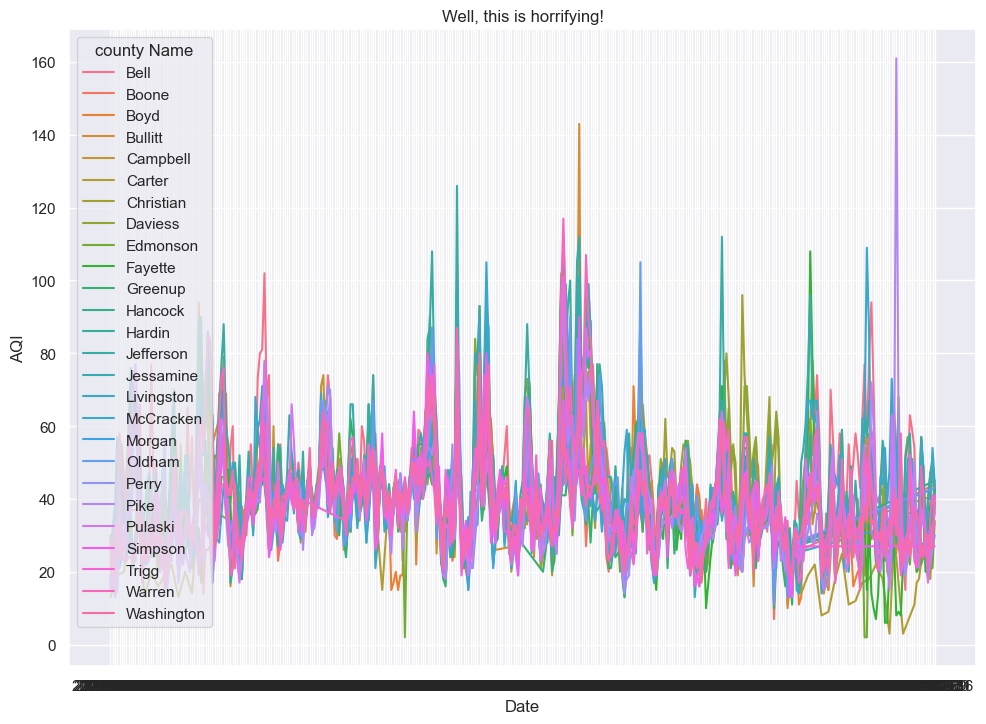

In [8]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = airq_kt, x = "Date", y = "AQI", hue= "county Name" ).set(title='Well, this is horrifying!')

In [8]:
so2_0 = pd.read_csv("daily_42401_2018_SO2.csv")
so2_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336150 entries, 0 to 336149
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           336150 non-null  int64  
 1   County Code          336150 non-null  int64  
 2   Site Num             336150 non-null  int64  
 3   Parameter Code       336150 non-null  int64  
 4   POC                  336150 non-null  int64  
 5   Latitude             336150 non-null  float64
 6   Longitude            336150 non-null  float64
 7   Datum                336150 non-null  object 
 8   Parameter Name       336150 non-null  object 
 9   Sample Duration      336150 non-null  object 
 10  Pollutant Standard   336150 non-null  object 
 11  Date Local           336150 non-null  object 
 12  Units of Measure     336150 non-null  object 
 13  Event Type           336150 non-null  object 
 14  Observation Count    336150 non-null  int64  
 15  Observation Perce

In [9]:
so2_k = so2_0[so2_0["State Name"] == "Kentucky"]
pd.unique(so2_k["County Name"])

array(['Boyd', 'Campbell', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Henderson', 'Jefferson', 'Jessamine', 'McCracken'], dtype=object)

In [89]:
import os
import geopandas as gpd
import plotly.graph_objects as go

## DATA FILE
# reformat our data as GeoPandas DF
crs = {'init': 'EPSG:4326'}
geometry = [Point(longlat) for longlat in zip(so2_k['Longitude'], so2_k['Latitude'])]
geo_df = gpd.GeoDataFrame(so2_k, crs = crs, geometry = geometry)
# geo_df.head()

## SHP FILE
# Unzipping and getting shape files
# C:\Users\Sanha Tahir\Downloads\GeorgeTown\Data Science I\Assignment 4\ShapeFiles\tl_2019_13_cousub
filename = "C:\\Users\\Sanha Tahir\\Downloads\\GeorgeTown\\Data Science I\\Assignment 4\\ShapeFiles\\tl_2019_13_cousub.shp"
map2 = gpd.read_file(filename)
# # Projects it onto a map:
# map2.to_crs(epsg = 4326).plot()

#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = go.Figure(data = go.Scattergeo(lon = geo_df["Longitude"], 
                                     lat = geo_df["Latitude"], 
                                     text = geo_df["City Name"], 
                                     mode = "markers"))
fig = fig.update_layout(title = "Map of SMT", geo_scope = 'usa')
fig.show()

C:\Users\Sanha Tahir\anaconda3\envs\my-env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [67]:
so2_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 102159 to 111464
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   State Code           9306 non-null   int64   
 1   County Code          9306 non-null   int64   
 2   Site Num             9306 non-null   int64   
 3   Parameter Code       9306 non-null   int64   
 4   POC                  9306 non-null   int64   
 5   Latitude             9306 non-null   float64 
 6   Longitude            9306 non-null   float64 
 7   Datum                9306 non-null   object  
 8   Parameter Name       9306 non-null   object  
 9   Sample Duration      9306 non-null   object  
 10  Pollutant Standard   9306 non-null   object  
 11  Date Local           9306 non-null   object  
 12  Units of Measure     9306 non-null   object  
 13  Event Type           9306 non-null   object  
 14  Observation Count    9306 non-null   int64   
 15  Observation Pe

In [61]:
so2_k.shape
# With 9,306 rows: only 12 map?
pd.unique(so2_k["City Name"])
# so2_k.sample(n=10)
for colnm in so2_k.columns:
    print("Column being checked: " + str(colnm))
    len(pd.unique(so2_k[colnm]))
    pd.unique(so2_k[colnm])

(9306, 30)

array(['Ashland', 'Highland Heights', 'Not in a city',
       'Lexington-Fayette (corporate name for Lexington)', 'Worthington',
       'Louisville', 'Nicholasville', 'Paducah'], dtype=object)

Column being checked: State Code


1

array([21], dtype=int64)

Column being checked: County Code


10

array([ 19,  37,  59,  61,  67,  89, 101, 111, 113, 145], dtype=int64)

Column being checked: Site Num


13

array([  17, 3002,    5,  501,   12,    7,   14, 1011,   51,   67, 1041,
          1, 1024], dtype=int64)

Column being checked: Parameter Code


1

array([42401], dtype=int64)

Column being checked: POC


1

array([1], dtype=int64)

Column being checked: Latitude


13

array([38.45934 , 39.021881, 37.780776, 37.13179 , 38.06503 , 38.548136,
       37.8712  , 37.654381, 38.06091 , 38.22876 , 38.23158 , 37.89147 ,
       37.05822 ])

Column being checked: Longitude


13

array([-82.64041 , -84.47445 , -87.075307, -86.142953, -84.49761 ,
       -82.731163, -87.46375 , -87.511427, -85.89804 , -85.65452 ,
       -85.82678 , -84.58825 , -88.57251 ])

Column being checked: Datum


2

array(['WGS84', 'NAD83'], dtype=object)

Column being checked: Parameter Name


1

array(['Sulfur dioxide'], dtype=object)

Column being checked: Sample Duration


2

array(['1 HOUR', '3-HR BLK AVG'], dtype=object)

Column being checked: Pollutant Standard


2

array(['SO2 1-hour 2010', 'SO2 3-hour 1971'], dtype=object)

Column being checked: Date Local


365

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

Column being checked: Units of Measure


1

array(['Parts per billion'], dtype=object)

Column being checked: Event Type


1

array(['None'], dtype=object)

Column being checked: Observation Count


24

array([23, 22, 20, 24, 11,  1, 12, 19, 21,  6, 10, 16, 13,  7,  4,  8,  5,
        3,  2, 18,  9, 14, 17, 15], dtype=int64)

Column being checked: Observation Percent


23

array([ 96.,  92.,  83., 100.,  46.,   4.,  50.,  79.,  88.,  25.,  42.,
        67.,  54.,  75.,  63.,  38.,  13.,  33.,   8.,  17.,  58.,  71.,
        29.])

Column being checked: Arithmetic Mean


1223

array([ 0.217391,  0.173913,  0.043478, ..., -1.714286,  2.466667,
        0.44    ])

Column being checked: 1st Max Value


200

array([ 2.000e+00,  1.000e+00,  3.000e+00,  0.000e+00,  7.000e+00,
        8.000e+00,  5.000e+00,  6.000e+00,  1.000e+01,  2.200e+01,
        9.000e+00,  6.000e-01,  1.300e+00,  2.300e+00,  3.000e-01,
        4.000e+00,  4.600e+00,  6.300e+00,  1.600e+00,  2.600e+00,
        3.600e+00,  1.230e+01,  4.300e+00,  1.800e+01,  1.700e+01,
        3.300e+00,  7.300e+00,  1.300e+01,  1.200e+01,  1.100e+01,
        1.500e+01,  2.000e+01,  2.400e+01,  5.300e+00,  9.300e+00,
        5.600e+00,  7.600e+00,  8.600e+00,  1.030e+01,  1.060e+01,
        1.400e+01,  8.300e+00,  1.560e+01,  1.760e+01,  2.100e+00,
        1.400e+00,  4.000e-01,  1.000e-01,  2.000e-01,  6.500e+00,
        4.500e+00,  1.900e+00,  9.000e-01,  1.100e+00,  5.000e-01,
        8.000e-01,  2.200e+00,  1.800e+00,  1.700e+00,  7.000e-01,
        1.500e+00,  1.200e+00,  3.200e+00,  2.700e+00,  2.900e+00,
        4.700e+00,  4.400e+00,  3.100e+00,  3.800e+00,  2.500e+00,
        2.400e+00,  6.600e+00,  1.600e+01,  1.900e+01,  4.400e

Column being checked: 1st Max Hour


24

array([17, 10, 22,  1, 12, 11,  9,  4, 13,  2, 19, 15, 16, 14,  7, 18,  5,
        0, 20, 23,  8,  6,  3, 21], dtype=int64)

Column being checked: AQI


61

array([  3.,   1.,   4.,   0.,  10.,  11.,   7.,   9.,  14.,  31.,  13.,
        nan,   6.,  26.,  24.,  19.,  17.,  16.,  21.,  29.,  34.,  20.,
        23.,  27.,  61.,  57.,  67., 101.,  44.,  94.,  54., 104., 106.,
        92., 107., 119., 120.,  30.,  37.,  86., 108., 113.,  62.,  49.,
        95.,  50.,  33.,  66.,  41., 110.,  52.,  40.,  74.,  60.,  69.,
        96.,  64.,  55.,  36.,  80.,  59.])

Column being checked: Method Code


4

array([100.,  nan, 560., 600.])

Column being checked: Method Name


4

array(['INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE', ' - ',
       'INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE',
       'Instrumental - Ultraviolet Fluorescence API 100 EU'], dtype=object)

Column being checked: Local Site Name


13

array(['ASHLAND PRIMARY (FIVCO)', 'NORTHERN KENTUCKY UNIVERSITY (NKU)',
       'OWENSBORO PRIMARY', 'Mammoth Cave NP - Houchin Meadow',
       'LEXINGTON PRIMARY', 'WORTHINGTON', 'BASKETT',
       'Sebree SO2 DRR Site', 'Watson Lane', 'CANNONS LANE',
       'Algonquin Parkway', 'NICHOLASVILLE',
       'JACKSON PURCHASE (PADUCAH PRIMARY)'], dtype=object)

Column being checked: Address


13

array(['FIVCO HEALTH DEPARTMENT, 2924 HOLT STREET',
       "524A JOHN'S HILL ROAD", '716 PLEASANT VALLEY ROAD',
       'MAMMOTH CAVE NP - ALFRED COOK ROAD',
       'FAYETTE COUNTY HEALTH DEPT, 650 NEWTOWN PIKE',
       'SCOTT STREET & CENTER AVENUE',
       'BASKETT FIRE DEPARTMENT, 7492 DR. HODGE ROAD',
       'Alcan Aluminum Road, 1.0 Miles South of Moss & Moss Road, Robards, KY  42452',
       '7201 WATSON LN, WATSON LN ELEMENTARY SCH',
       '2730 CANNONS LANE, BOWMAN FIELD', '4201 ALGONQUIN PKWY',
       'KYTC MAINTENANCE GARAGE,  260 WILSON DRIVE',
       'JACKSON PURCHASE RECC, 2901 POWELL STREET'], dtype=object)

Column being checked: State Name


1

array(['Kentucky'], dtype=object)

Column being checked: County Name


10

array(['Boyd', 'Campbell', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Henderson', 'Jefferson', 'Jessamine', 'McCracken'], dtype=object)

Column being checked: City Name


8

array(['Ashland', 'Highland Heights', 'Not in a city',
       'Lexington-Fayette (corporate name for Lexington)', 'Worthington',
       'Louisville', 'Nicholasville', 'Paducah'], dtype=object)

Column being checked: CBSA Name


8

array(['Huntington-Ashland, WV-KY-OH', 'Cincinnati, OH-KY-IN',
       'Owensboro, KY', 'Bowling Green, KY', 'Lexington-Fayette, KY',
       'Evansville, IN-KY', 'Louisville/Jefferson County, KY-IN',
       'Paducah, KY-IL'], dtype=object)

Column being checked: Date of Last Change


1

array(['2021-11-04'], dtype=object)

Column being checked: geometry


13

<GeometryArray>
Length: 13, dtype: geometry

In [58]:
#* so2_k["City Name"].value_counts()
so2k_worthington = so2_k[so2_k["City Name"] == "Worthington"]
len(pd.unique(so2_k["City Name"]))
len(pd.unique(so2k_worthington["Date Local"]))
len(pd.unique(so2_k["Date Local"]))
pd.unique(so2_k["Datum"])
pd.unique(so2_k["Parameter Name"])
pd.unique(so2_k["Sample Duration"])

8

362

365

array(['WGS84', 'NAD83'], dtype=object)

array(['Sulfur dioxide'], dtype=object)

array(['1 HOUR', '3-HR BLK AVG'], dtype=object)

In [65]:
pd.DataFrame(so2_k.groupby(["City Name", "Longitude", "Latitude"]))

,0,1
0,"(Ashland, -82.64041, 38.45934)",State Code County Code Site Num Par...
1,"(Highland Heights, -84.47445, 39.021881)",State Code County Code Site Num Par...
2,(Lexington-Fayette (corporate name for Lexingt...,State Code County Code Site Num Par...
3,"(Louisville, -85.89804, 38.06091)",State Code County Code Site Num Par...
4,"(Louisville, -85.82678, 38.23158)",State Code County Code Site Num Par...
5,"(Louisville, -85.65452, 38.22876)",State Code County Code Site Num Par...
6,"(Nicholasville, -84.58825, 37.89147)",State Code County Code Site Num Par...
7,"(Not in a city, -87.511427, 37.654381)",State Code County Code Site Num Par...
8,"(Not in a city, -87.46375, 37.8712)",State Code County Code Site Num Par...
9,"(Not in a city, -87.075307, 37.780776)",State Code County Code Site Num Par...


In [66]:
pd.DataFrame(so2_k.groupby(["Method Code", "Method Name"]))

,0,1
0,"(100.0, INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE)",State Code County Code Site Num Par...
1,"(560.0, INSTRUMENTAL - Pulsed Fluorescent 43C-...",State Code County Code Site Num Par...
2,"(600.0, Instrumental - Ultraviolet Fluorescenc...",State Code County Code Site Num Par...


# Vizzzz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [15]:
# so2_k["Month"] = [dat[5:7] for dat in so2_k["Date Local"]]
so2_k["YM"] = [dat[:7] for dat in so2_k["Date Local"]]
so2_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 102159 to 111464
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State Code           9306 non-null   int64  
 1   County Code          9306 non-null   int64  
 2   Site Num             9306 non-null   int64  
 3   Parameter Code       9306 non-null   int64  
 4   POC                  9306 non-null   int64  
 5   Latitude             9306 non-null   float64
 6   Longitude            9306 non-null   float64
 7   Datum                9306 non-null   object 
 8   Parameter Name       9306 non-null   object 
 9   Sample Duration      9306 non-null   object 
 10  Pollutant Standard   9306 non-null   object 
 11  Date Local           9306 non-null   object 
 12  Units of Measure     9306 non-null   object 
 13  Event Type           9306 non-null   object 
 14  Observation Count    9306 non-null   int64  
 15  Observation Percent  9306 non-n

In [16]:
so2_k["AQI"]

102159    3.0
102160    1.0
102161    3.0
102162    1.0
102163    4.0
         ... 
111460    NaN
111461    NaN
111462    NaN
111463    NaN
111464    NaN
Name: AQI, Length: 9306, dtype: float64

Text(0, 0.5, 'PM2.5 (µg/m3)')

Text(0.5, 0, 'Year-Month')

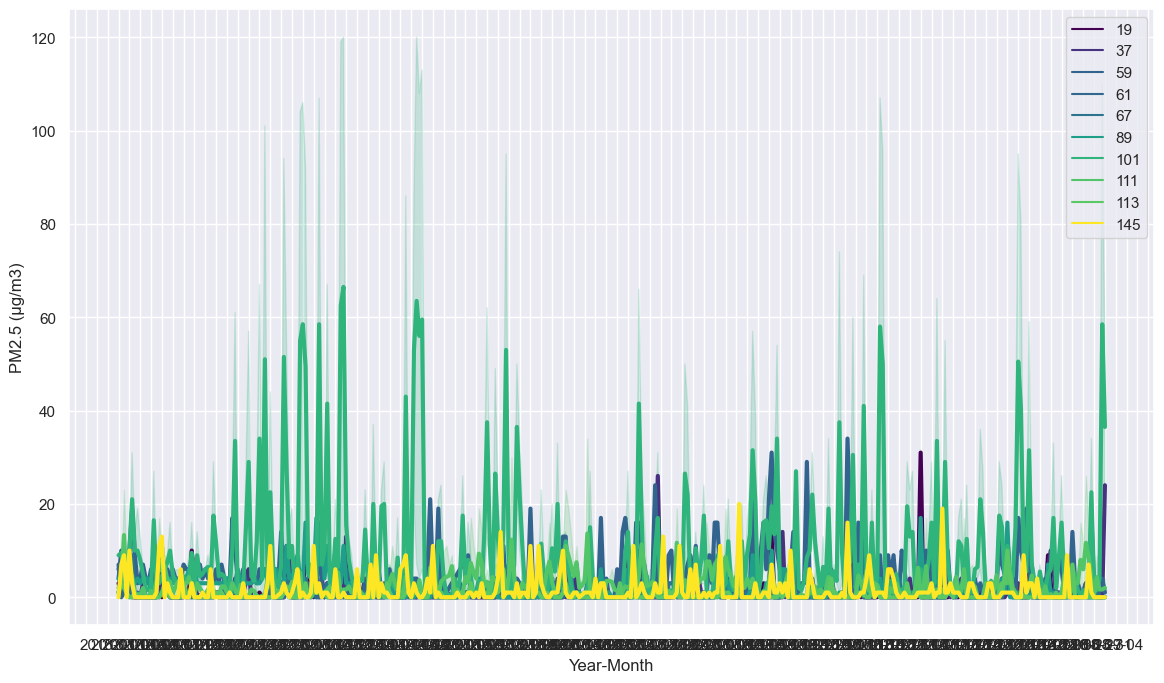

In [18]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data= so2_k, x ='Date Local', y = 'AQI',
                  hue='County Code', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

In [92]:
list_scode = list(set(so2_k['County Name']))

import plotly.graph_objects as go

#extract color palette, the palette name can be changed
pal = list(sns.color_palette(palette="rocket", n_colors=len(list_scode)).as_hex())

months = list(reversed([str(i) for i in list(range(1,13))])) + ['12']
list_PM = [[list(so2_k[so2_k['County Name']==i]['AQI'])[int(n)-1] for n in months] for i in list_scode]

fig = go.Figure()

for pm,d,c in zip(list_PM, list_scode, pal):
    fig.add_trace(go.Scatterpolar(r = pm, theta=months, fill= None,
                                  name=str(d), marker = dict(color = c)));

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 25]),
                               angularaxis = dict(rotation=90)),
                  showlegend=True, width=700, height=600,
                  font = dict(size=14));

In [93]:
fig.show()

In [84]:
max_val = max(so2_k["AQI"])*1.001        #set max value
# pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(list_scode)).as_hex())
pal = list(sns.color_palette(palette='YlOrRd', n_colors=12).as_hex())

def circular_bar(input_df, column_name, title):
    plt.gcf().set_size_inches(12, 12)
    ax = plt.subplot(projection='polar')
    input_df.reset_index(inplace=True, drop=True)
    print(len(input_df))
    for i in range(len(pd.unique(input_df['County Name']))):
        ax.barh(i, input_df[column_name][i]*2*np.pi/max_val, 
                label=input_df['County Name'][i], 
                color=pal[i])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(1)
    ax.set_rlabel_position(0)
    ax.set_thetagrids([], labels=[])
    ax.set_rgrids(range(len(input_df)), labels= input_df['County Name'])

    ax = plt.subplot(projection='polar')
    plt.title("Average PM2.5 // " + title)
    return ax

In [79]:
pal[0]

'#fff4b2'

0
714


<PolarAxesSubplot:title={'center':'Average PM2.5 // 2018-01'}>

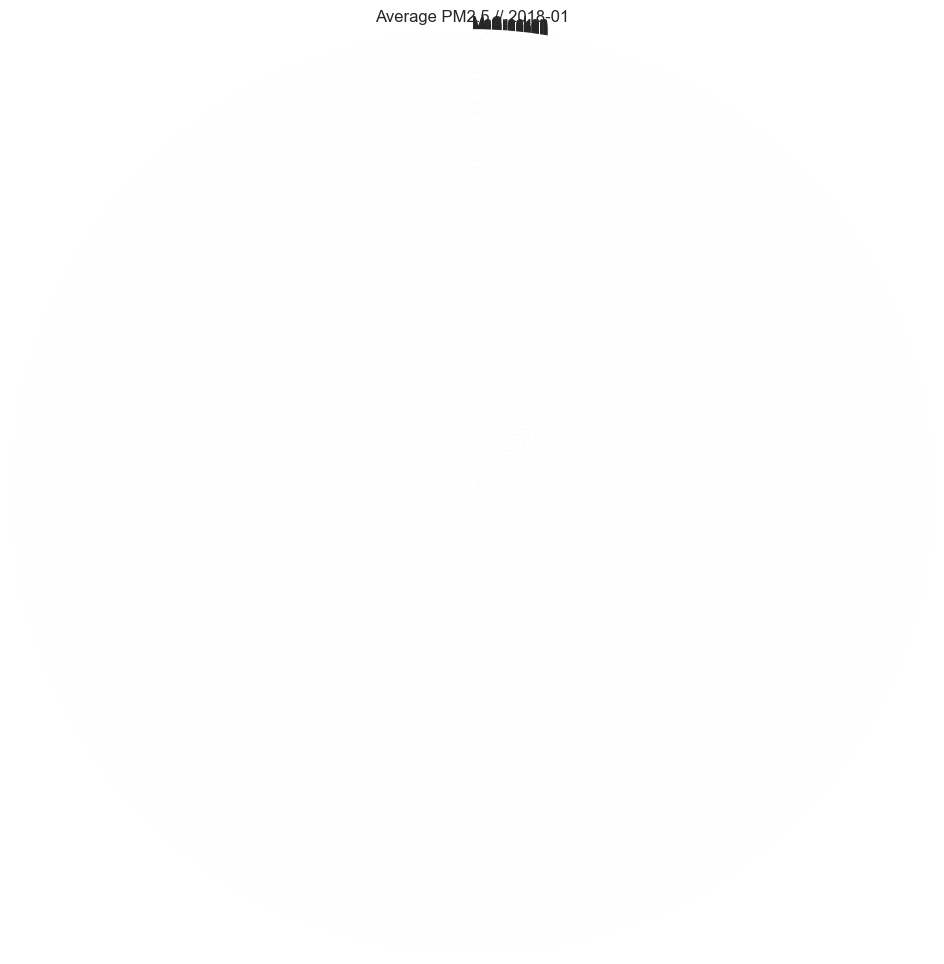

1
769


<PolarAxesSubplot:title={'center':'Average PM2.5 // 2018-02'}>

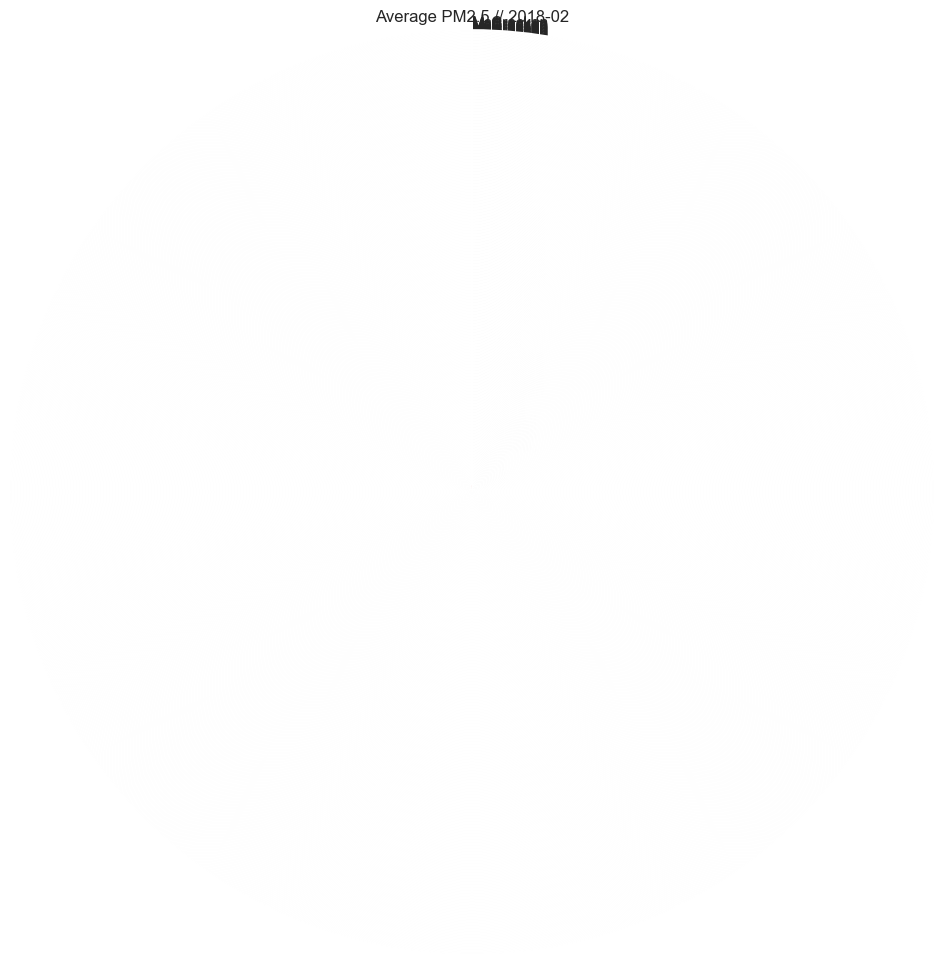

2
804


<PolarAxesSubplot:title={'center':'Average PM2.5 // 2018-03'}>

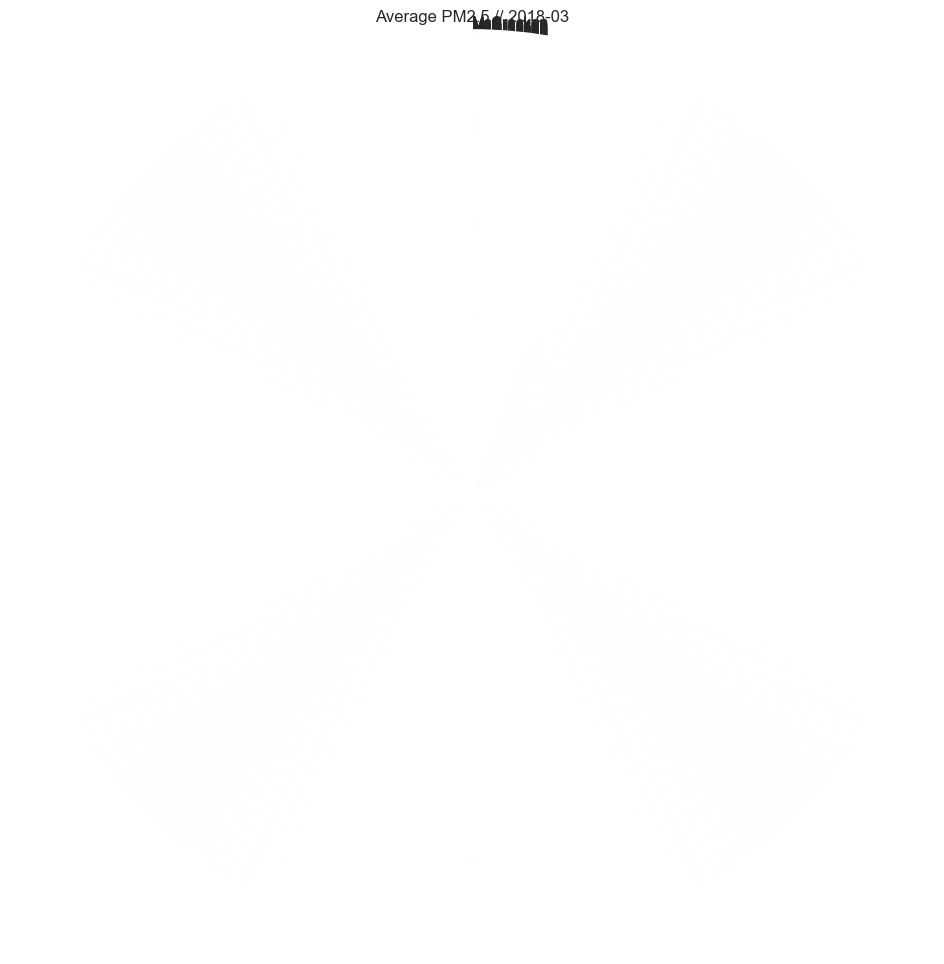

3
770


<PolarAxesSubplot:title={'center':'Average PM2.5 // 2018-04'}>

KeyboardInterrupt: 

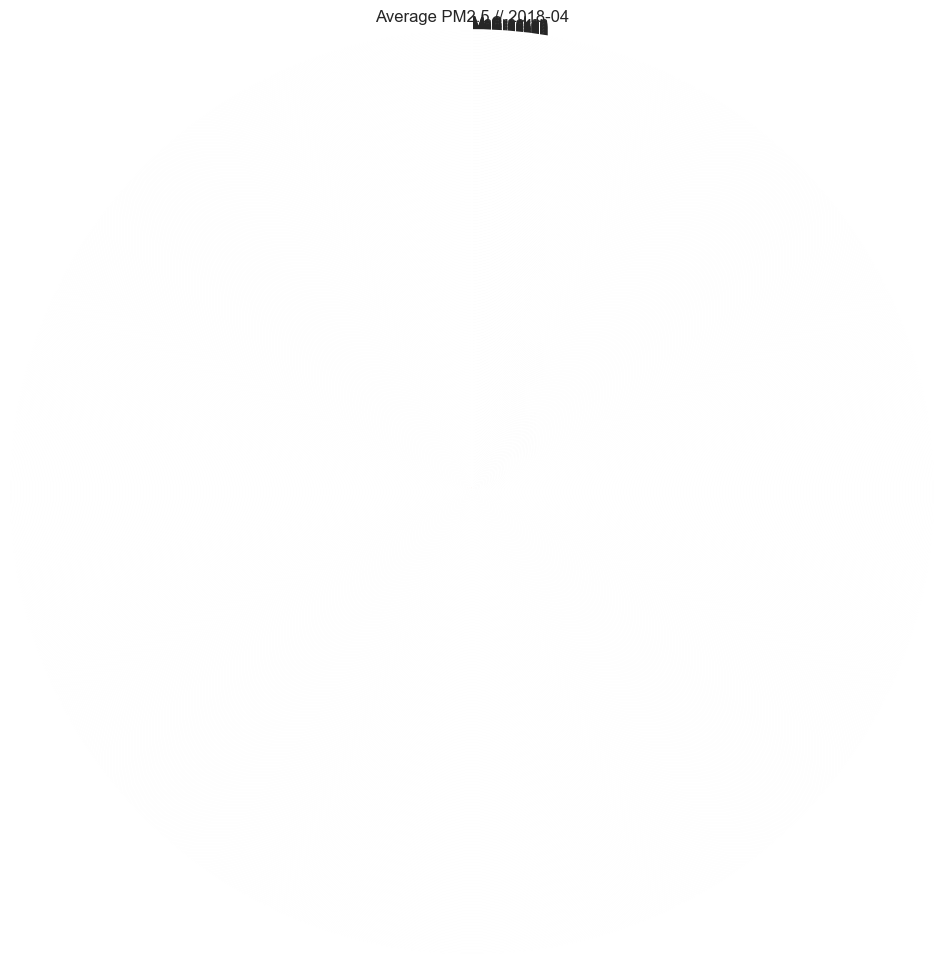

In [85]:
list_month19 = list(set(so2_k['Month']))
list_YM19 = list(set(so2_k['YM']))
list_YM19.sort()
listdf_monthly19 = [so2_k[so2_k['Month']==str(i)] for i in list_month19]

keep_sname = []
order = range(len(listdf_monthly19))
for i in order:
    print(i)
    circular_bar(listdf_monthly19[i],'AQI', list_YM19[i])
    keep_sname.append('cir_bar_' + str(i) + '.png')
    plt.savefig('cir_bar_' + str(i) + '.png')
    plt.show()